In [1]:
from bs4 import BeautifulSoup as bsoup
import pandas as pd 
import numpy as np
import requests
import pprint
import matplotlib.pyplot as plt
import seaborn as sns    



In [2]:
#Main link to the website

linkHouses = 'https://www.buyrentkenya.com/houses-for-rent'

#Generating links for the firdt 50 pages

links =[]

for i in range(2,70):
    link = (linkHouses + f"?page={i}")
    links.append(link)
    
    

#Creating a soup object for each link

main_soup =[]
for i in links[1:]:
    text = requests.get(i)
    soup = bsoup(text.text,'lxml')
    main_soup.append(soup)

len(main_soup)

#Extracting the houses and location

spans =[]
for i in main_soup:
   spans.append( i.find_all('span',class_='relative top-[2px] hidden md:inline'))
    
spans

houses=[]
for span in spans:
   houses.append([str(i.text).strip() for i in span])



#Extracting the Prices of the houses

divs = []
for i in main_soup:
    div =i.find_all('div',class_='flex items-center justify-center text-xl font-bold leading-7 text-grey-900')
    divs.append(div)  

        

prices=[]
for div in divs:
    text = [str(i.text).strip().split()[1] for i in div[::2]]
    prices.append(text)
    
    
#Ensuring that the number of houses is equal to the number of prices extracted from a paage for it to be included in the data set
mainHouses = [i for i,j in zip(houses,prices) if len(i)==len(j)]
mainPrices = [i for i,j in zip(prices,houses) if len(i)==len(j)]

#Creating one list for all houses and prices
mainPrices =[i for j in mainPrices for i in j]
mainHouses = [i for j in mainHouses for i in j]

#Creating a dictionary for use to create  a dataframe
dictHouses = {'Houses':mainHouses, 'Prices':mainPrices}




In [3]:
 #A dataframe to be cleaned further and prepped for analysis
dfHouses= pd.DataFrame.from_dict(data=dictHouses)
dfHouses.head()

,Houses,Prices
0,3 Bed House with En Suite at Icipe Road,"95,000"
1,4 Bed Villa with En Suite at Grevillea Grove Road,"300,000"
2,5 Bed Villa with En Suite at Peponi Road,"580,000"
3,3 Bed House with En Suite in Lavington,"200,000"
4,5 Bed Townhouse with En Suite at Nyeri Road,"200,000"


In [4]:
#Function that gets the location of each house
def location(row):
    estate=''
    loc =row['Houses'].split()
    
    InIsHere = 'in' in loc
    AtIsHere = 'at'in loc
    
    if InIsHere == True:   
        indIn = loc.index('in')     
        estate = ' ' .join(loc[indIn+1:]).strip()
        return estate
    elif AtIsHere == True  :        
        indAt = loc.index('at')
        estate = ' ' .join(loc[indAt+1:]).strip()
       
        return estate
    elif InIsHere== False or AtIsHere== False:
        return 404  


    
dfHouses['Towns'] = dfHouses.apply(location, axis= 1)
dfHouses.head(12)

,Houses,Prices,Towns
0,3 Bed House with En Suite at Icipe Road,"95,000",Icipe Road
1,4 Bed Villa with En Suite at Grevillea Grove Road,"300,000",Grevillea Grove Road
2,5 Bed Villa with En Suite at Peponi Road,"580,000",Peponi Road
3,3 Bed House with En Suite in Lavington,"200,000",Lavington
4,5 Bed Townhouse with En Suite at Nyeri Road,"200,000",Nyeri Road
5,4 Bed Townhouse with En Suite in Karen,"250,000",Karen
6,5 Bed House with En Suite at Loresho,"350,000",Loresho
7,6 Bed House with Garden in Karen,"525,000",Karen
8,4 Bed Townhouse with En Suite at Kileleshwa Road,"380,000",Kileleshwa Road
9,4 Bed Townhouse with En Suite in Kileleshwa,"330,000",Kileleshwa


In [6]:
#Extracting the bedrooms in each house
def beds(row):
    str = row['Houses'].split()
    beds =' '.join(str[:2]).strip() 
    return beds
dfHouses['beds']=dfHouses.apply(beds,axis=1)
dfHouses.head(10)

,Houses,Prices,Towns,beds
0,3 Bed House with En Suite at Icipe Road,"95,000",Icipe Road,3 Bed
1,4 Bed Villa with En Suite at Grevillea Grove Road,"300,000",Grevillea Grove Road,4 Bed
2,5 Bed Villa with En Suite at Peponi Road,"580,000",Peponi Road,5 Bed
3,3 Bed House with En Suite in Lavington,"200,000",Lavington,3 Bed
4,5 Bed Townhouse with En Suite at Nyeri Road,"200,000",Nyeri Road,5 Bed
5,4 Bed Townhouse with En Suite in Karen,"250,000",Karen,4 Bed
6,5 Bed House with En Suite at Loresho,"350,000",Loresho,5 Bed
7,6 Bed House with Garden in Karen,"525,000",Karen,6 Bed
8,4 Bed Townhouse with En Suite at Kileleshwa Road,"380,000",Kileleshwa Road,4 Bed
9,4 Bed Townhouse with En Suite in Kileleshwa,"330,000",Kileleshwa,4 Bed


In [21]:
#Extracting special ammenities listed in a house 
def amenities(row):
    arr = row['Houses'].split()
    
    if 'with' in arr:
        if 'at' in arr:
            indWith = arr.index('with')
            indAt = arr.index('at')
            amenity = arr[indWith+1:indAt]
            return ' '.join(amenity)
        elif 'in' in arr:
            indWith = arr.index('with')
            indIn = arr.index('in')
            amenity = arr[indWith+1:indIn]
            return  ' '.join(amenity)
        else :
            return 'Unspecified'
        
    else :
        return 'Unspecified'
    

dfHouses['Ammenity']= dfHouses.apply(amenities,axis=1)
dfHouses.head(20)

    

In [26]:

#Extracting House Type from scrapped data
def HouseType(row):
    HouseType = row['Houses'].split()[2]
    return HouseType



dfHouses['Type']= dfHouses.apply(HouseType,axis=1)


,Houses,Prices,Towns,beds,Ammenity,Type
0,3 Bed House with En Suite at Icipe Road,"95,000",Icipe Road,3 Bed,En Suite,House
1,4 Bed Villa with En Suite at Grevillea Grove Road,"300,000",Grevillea Grove Road,4 Bed,En Suite,Villa
2,5 Bed Villa with En Suite at Peponi Road,"580,000",Peponi Road,5 Bed,En Suite,Villa
3,3 Bed House with En Suite in Lavington,"200,000",Lavington,3 Bed,En Suite,House
4,5 Bed Townhouse with En Suite at Nyeri Road,"200,000",Nyeri Road,5 Bed,En Suite,Townhouse
5,4 Bed Townhouse with En Suite in Karen,"250,000",Karen,4 Bed,En Suite,Townhouse
6,5 Bed House with En Suite at Loresho,"350,000",Loresho,5 Bed,En Suite,House
7,6 Bed House with Garden in Karen,"525,000",Karen,6 Bed,Garden,House
8,4 Bed Townhouse with En Suite at Kileleshwa Road,"380,000",Kileleshwa Road,4 Bed,En Suite,Townhouse
9,4 Bed Townhouse with En Suite in Kileleshwa,"330,000",Kileleshwa,4 Bed,En Suite,Townhouse


In [33]:
#Removing commas in prices

dfHouses['Prices'] = dfHouses['Prices'].apply(lambda x : str(x).replace(",",""))
dfHouses['Prices'] = dfHouses['Prices'].astype(dtype='int64')
dfHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Houses    1331 non-null   object
 1   Prices    1331 non-null   int64 
 2   Towns     1331 non-null   object
 3   beds      1331 non-null   object
 4   Ammenity  1331 non-null   object
 5   Type      1331 non-null   object
dtypes: int64(1), object(5)
memory usage: 62.5+ KB


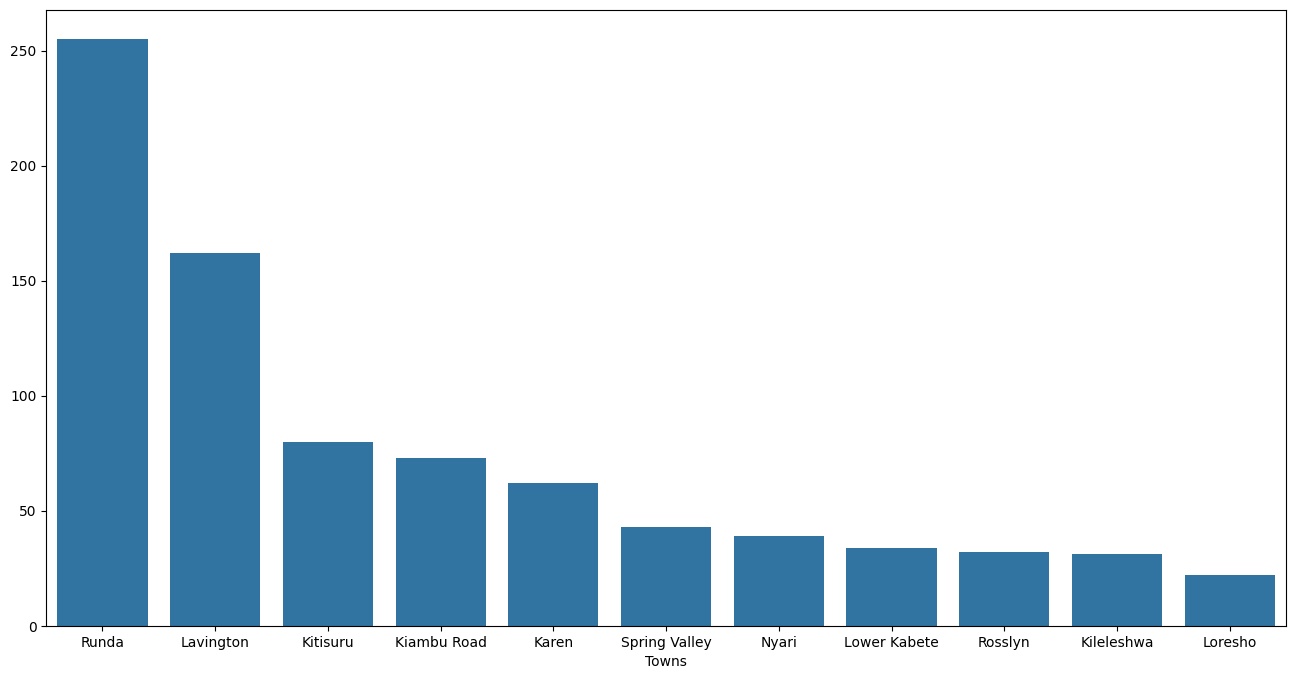

In [34]:
locationRank = dfHouses['Towns'].value_counts()[:11]

plt.figure(figsize=(16,8))
sns.barplot(x=locationRank.index,y=locationRank.values)

plt.show()

In [28]:
dfHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Houses    1331 non-null   object
 1   Prices    1331 non-null   object
 2   Towns     1331 non-null   object
 3   beds      1331 non-null   object
 4   Ammenity  1331 non-null   object
 5   Type      1331 non-null   object
dtypes: object(6)
memory usage: 62.5+ KB


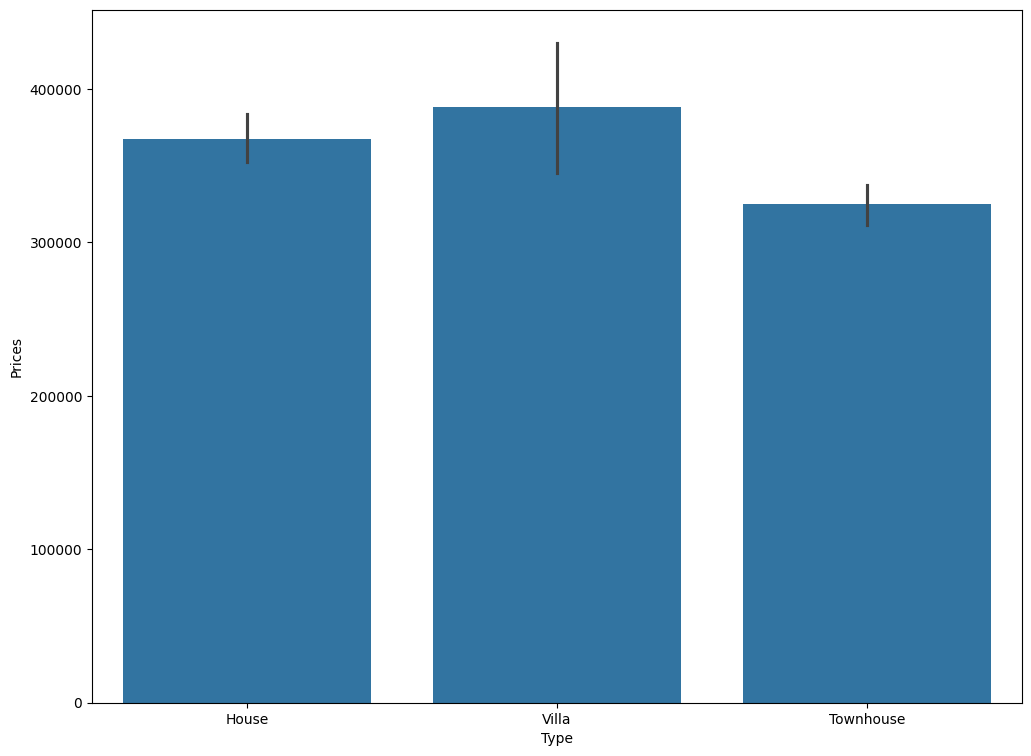

In [36]:
plt.figure(figsize=(12,9))
sns.barplot(data= dfHouses, x='Type',y='Prices')
plt.show()

In [38]:
#dfHouses.drop('Houses',axis=1).to_excel("houses.xlsx",index=False)